In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Step 3: Download the SMS Spam Collection dataset
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown


In [3]:
# Step 4: Unzip the downloaded file
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: spam.csv                


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Step 2: Load Dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only the label and text columns
df.columns = ['label', 'text']

In [7]:
 #Step 3: Preprocess Data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encode labels

In [8]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [9]:
# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [10]:

# Step 6: Initialize and Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": LinearSVC()
}

In [11]:
# Step 7: Train and Evaluate Each Model
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

--- Naive Bayes ---
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 37 113]]


--- Logistic Regression ---
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
 [[962   3]
 [ 50 100]]


--- Support Vector Machine ---
Accuracy: 0.97847533632287
Classification Report:
               precisio

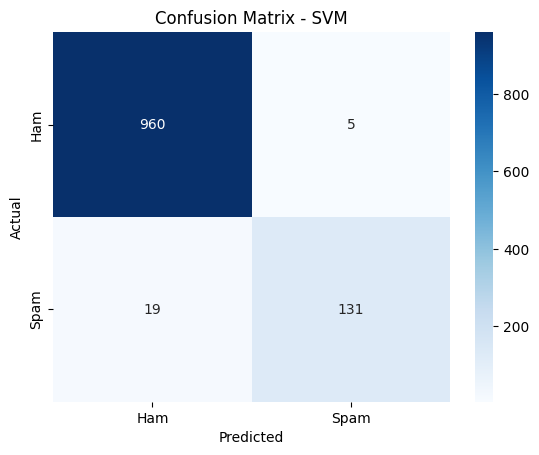

In [12]:
# Optional: Plot Confusion Matrix for Best Model
best_model = LinearSVC()
best_model.fit(X_train_tfidf, y_train)
y_pred = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()